In [ ]:
# Import Library
!pip install wordcloud

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import csv
import nltk

In [ ]:
# importing the dataset
data = pd.read_csv("/content/drive/MyDrive/dataset_imdb/IMDB Dataset.csv")

# Understanding the Dataset

In [ ]:
# top values of the data-set
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# shape of the data
data.shape

(50000, 2)

In [ ]:
# column names
data.columns

Index(['review', 'sentiment'], dtype='object')

<ipython-input-7-575fee6136a3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


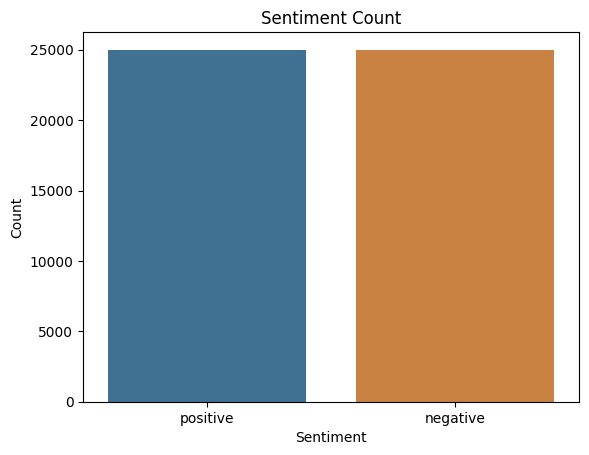

In [ ]:
sns.countplot(
    x='sentiment',
    data=data,
    palette={'positive': '#3274A1', 'negative': '#E1812C'}  # Menggunakan kode warna HEX
)

# Tambahkan label pada chart
plt.title("Sentiment Count")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Text Cleanning and Preprocessing

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
class TextProcessing:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))

    def get_wordcounts(self, text):
        # Menghitung jumlah kata dalam teks
        return len(text.split())

    def get_charcounts(self, text):
        # Menghitung jumlah karakter dalam teks (termasuk spasi)
        return len(text)

    def get_avg_wordlength(self, text):
        # Menghitung panjang rata-rata kata dalam teks
        words = text.split()
        return sum(len(word) for word in words) / len(words) if words else 0

    def get_stopwords_counts(self, text):
        # Menghitung jumlah stopwords dalam teks
        words = text.split()
        return sum(1 for word in words if word in self.stop_words)

    def remove_html_tags(self, text):
        # Menghapus tag HTML menggunakan BeautifulSoup
        return BeautifulSoup(text, "html.parser").get_text()

    def remove_stop_words(self, x):
        return ' '.join([word for word in x.split() if word not in stopwords.words('english')])


In [ ]:
# Inisialisasi objek TextProcessing
text_processing = TextProcessing()

In [ ]:
data['word_counts'] = data['review'].apply(lambda x: text_processing.get_wordcounts(x))
data['char_counts'] = data['review'].apply(lambda x: text_processing.get_charcounts(x))
data['avg_wordlength'] = data['review'].apply(lambda x: text_processing.get_avg_wordlength(x))
data['stopwords_counts'] = data['review'].apply(lambda x: text_processing.get_stopwords_counts(x))

In [ ]:
# Menghapus tag HTML dan mengubah ke lowercase
data['review'] = data['review'].apply(lambda x: text_processing.remove_html_tags(x))
data['review'] = data['review'].str.lower()

<ipython-input-9-f6b6f435fb49>:25: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [ ]:
data['review_without_stopwords'] = data['review'].apply(lambda x: text_processing.remove_stop_words(x))

In [ ]:
data.head()

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts,review_without_stopwords
0,one of the other reviewers has mentioned that ...,positive,307,1761,4.739414,122,one reviewers mentioned watching 1 oz episode ...
1,a wonderful little production. the filming tec...,positive,162,998,5.166667,62,wonderful little production. filming technique...
2,i thought this was a wonderful way to spend ti...,positive,166,926,4.584337,70,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,138,748,4.427536,58,basically there's family little boy (jake) thi...
4,"petter mattei's ""love in the time of money"" is...",positive,230,1317,4.730435,92,"petter mattei's ""love time money"" visually stu..."


# Wordcloud

In [ ]:
from wordcloud import WordCloud

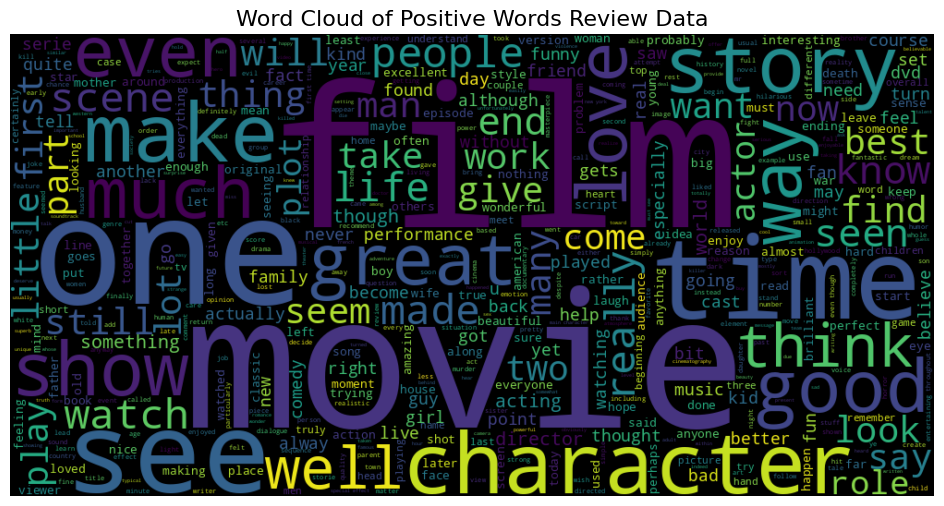

In [ ]:
positive_reviews = data[data['sentiment'] == 'positive']['review']

list_words_positive = ' '.join(positive_reviews)

wordcloud_positive = WordCloud(width=1000, height=500, max_words = 500, min_font_size=5).generate(list_words_positive)

# Plot WordCloud
plt.figure(figsize=(12, 6))
plt.title('Word Cloud of Positive Words Review Data', fontsize=16)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

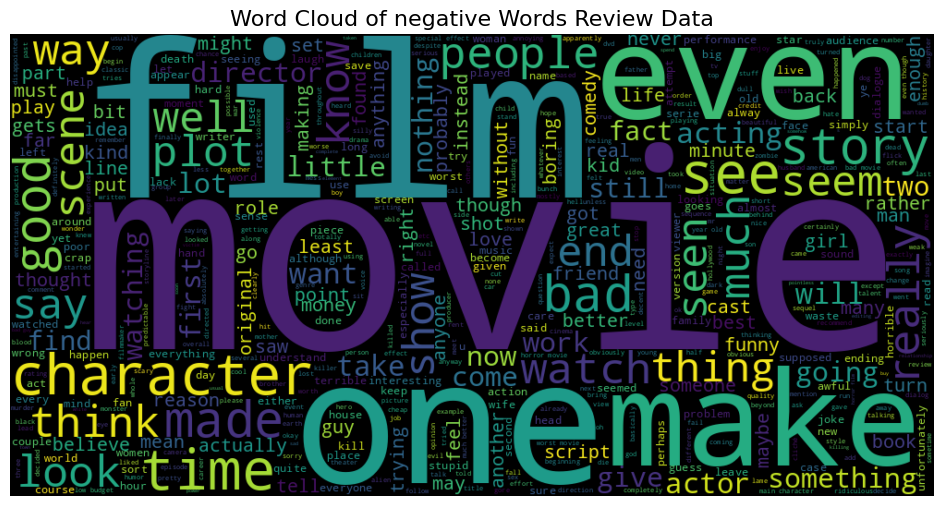

In [ ]:
negative_reviews = data[data['sentiment'] == 'negative']['review']

list_words_negative = ' '.join(negative_reviews)

wordcloud_negative = WordCloud(width=1000, height=500, max_words =500,min_font_size=5).generate(list_words_negative)

# Plot WordCloud
plt.figure(figsize=(12, 6))
plt.title('Word Cloud of negative Words Review Data', fontsize=16)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

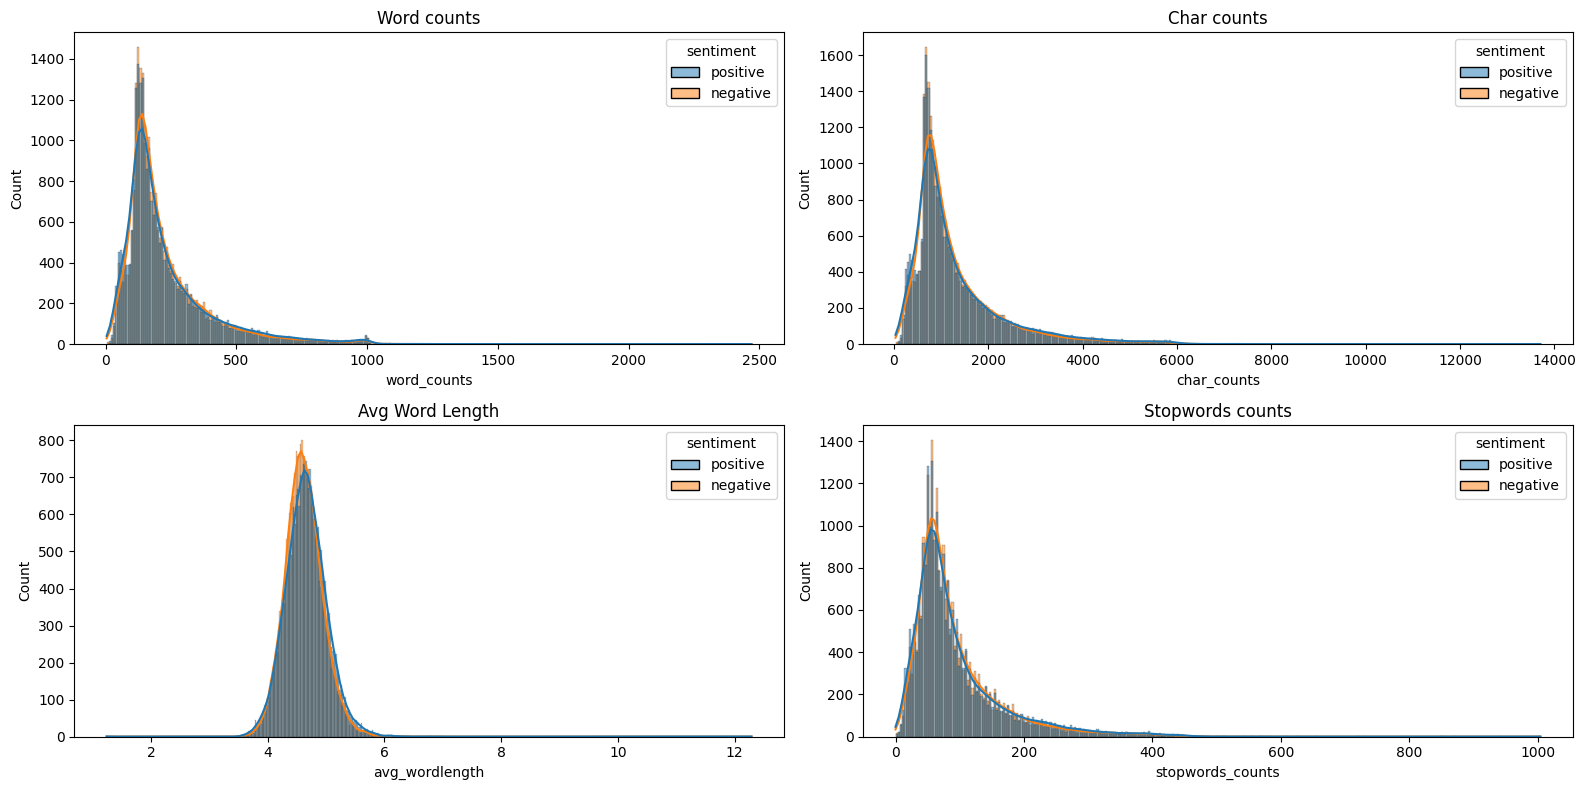

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(data=data, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=data, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=data, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=data, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()

# Word Embedding, Feature Extraction, Fitur Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['review'],
                                                    data['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=data['sentiment']
                                                   )

In [ ]:
X_train.shape, X_test.shape

((40000,), (10000,))

# Sentiment Classification

## Unsupervised Sentiment Analysis (VADER & TextBlob)

In [ ]:
!pip install vaderSentiment

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# VADER
vader = SentimentIntensityAnalyzer()
data['vader_sentiment'] = data['review'].apply(lambda x: vader.polarity_scores(x)['compound'])
data['vader_pred'] = data['vader_sentiment'].apply(lambda x: 1 if x >= 0 else 0)

In [ ]:
# TextBlob
data['textblob_sentiment'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['textblob_pred'] = data['textblob_sentiment'].apply(lambda x: 1 if x >= 0 else 0)

## Supervised Sentiment Analysis (Bernoulli NB & Multinomial NB)

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [ ]:
# Bernoulli Naive Bayes
bnb = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Langkah pertama: Ekstraksi fitur dengan Tfidf
    ('clf', BernoulliNB())         # Langkah kedua: Klasifikasi dengan Bernoulli Naive Bayes
])

bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)


In [ ]:
# Multinomial Naive Bayes
mnb = Pipeline([
    ('tfidf', TfidfVectorizer()),   # Langkah pertama: Ekstraksi fitur dengan Tfidf
    ('clf', MultinomialNB())        # Langkah kedua: Klasifikasi dengan Multinomial Naive Bayes
])

mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Evaluation and Confusion Matrix

In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):

    try:
        # Attempt to access the first element using index 0
        first_element = y_true.iloc[0]
    except IndexError:
        # Handle the case where y_true is empty
        print("y_true is empty, cannot evaluate the model.")
        return None  # or raise an exception if preferred

     # Check if y_true is empty
    if len(y_true) == 0:
        print("y_true is empty, cannot evaluate the model.")
        return None  # or raise an exception if preferred

    # Check if the first element is a string
    if isinstance(y_true.iloc[0] if hasattr(y_true, 'iloc') else y_true[0], str):
        # If string labels, map to numerical labels
        label_map = {'positive': 1, 'negative': 0}
        y_true = y_true.map(label_map) if hasattr(y_true, 'map') else [label_map.get(label) for label in y_true]

    # Apply label mapping for predictions, if they are strings
    if isinstance(y_pred[0], str): # Check if the element is a string
        y_pred = [label_map.get(label) for label in y_pred]

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Print metrics below the confusion matrix
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")

    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    }

# Evaluate models
results = []



In [ ]:
y = data['sentiment'].map({'positive': 1, 'negative': 0})

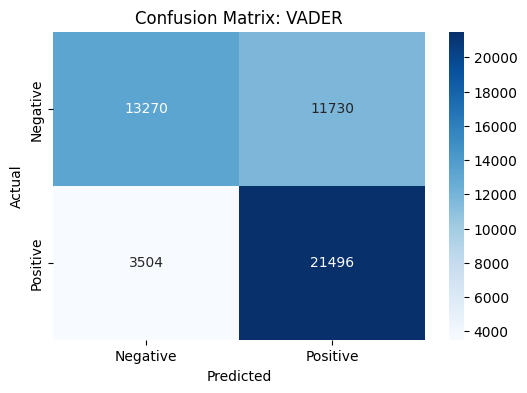

VADER Metrics:
Accuracy: 0.6953
Precision: 0.6470
Recall: 0.8598
F1 Score: 0.7384
ROC AUC: 0.6953


In [ ]:
# VADER
results.append(evaluate_model(y, data['vader_pred'], "VADER"))

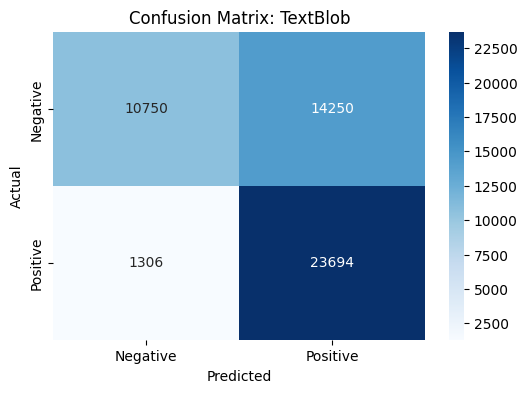

TextBlob Metrics:
Accuracy: 0.6889
Precision: 0.6244
Recall: 0.9478
F1 Score: 0.7529
ROC AUC: 0.6889


In [ ]:
# TextBlob
results.append(evaluate_model(y, data['textblob_pred'], "TextBlob"))

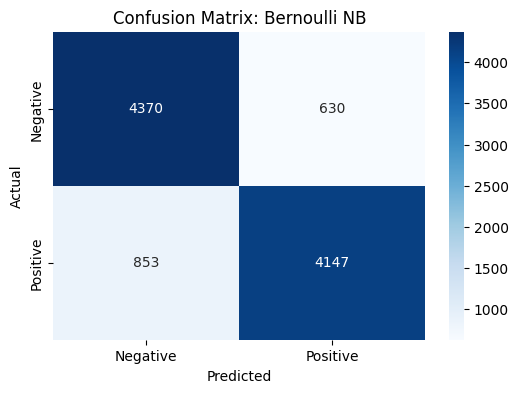

Bernoulli NB Metrics:
Accuracy: 0.8517
Precision: 0.8681
Recall: 0.8294
F1 Score: 0.8483
ROC AUC: 0.8517


In [ ]:
# Bernoulli NB
results.append(evaluate_model(y_test, y_pred_bnb, "Bernoulli NB"))

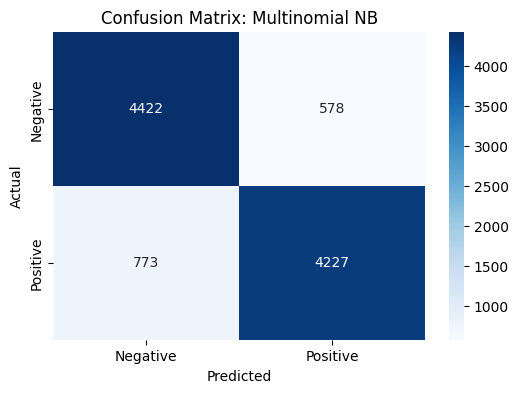

Multinomial NB Metrics:
Accuracy: 0.8649
Precision: 0.8797
Recall: 0.8454
F1 Score: 0.8622
ROC AUC: 0.8649


In [ ]:
# Multinomial NB
results.append(evaluate_model(y_test, y_pred_mnb, "Multinomial NB"))

In [ ]:
# Display Results in Table
results_df = pd.DataFrame(results)
print(results_df)

            Model  Accuracy  Precision   Recall  F1 Score  ROC AUC
0           VADER   0.69532   0.646963  0.85984  0.738364  0.69532
1        TextBlob   0.68888   0.624447  0.94776  0.752860  0.68888
2    Bernoulli NB   0.85170   0.868118  0.82940  0.848317  0.85170
3  Multinomial NB   0.86490   0.879709  0.84540  0.862213  0.86490


In [ ]:
mnb.predict(['Wow, this is amazing lesson'])

array(['positive'], dtype='<U8')

In [ ]:
mnb.predict(['I dont want to watch this movie again'])

array(['negative'], dtype='<U8')

In [ ]:
import pickle
pickle.dump(mnb, open('sentiment_analysis.pkl', 'wb')) #Export model